## Final Project-- Investigating Used Car Selling Price
**Group:**
* Alex Kim-Koutsis
* Rushil Joshi
* Ben Snyder
* David Morin

**Outline:**
* Data Collection
  * Libraries
* Data Processing
  * Missing Data
  * Data Types
* Data Visualization
  * Predictions
* Data Analysis
  * Preprocessing
  * Train/Validation Split
* Insights

**Overview:**

For this project, we will walk through all the stages of data science we have covered in this class-- ranging from data collection (finding the data/exporting it), data processing (cleaning the data and making it suitable for analysis), data visualization (graphing the data, finding rough patterns/relationships), data analysis (confirming relationships found in our data exploration and fitting machine learning models to predict new data), and finally potential insights (what do our conclusions show us about the data/society?).

We have chosen the Used Car data set, sourced from this database: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

For people buying or attempting to sell their used cars, it would be useful to figure out which parts of the car/statistics involved are most important to maximize the price. We will attempt to see the the impact of various variables, including the year the car was bought, the number of kilometers the car was driven, the fuel type of the car, the number of previous owners of the car, and the selling price of the car.

We hope to see which of these values significantly decrease the price of the car, which values significantly increase the price, and which values do not significantly influence the price of the car. 

Through these conclusions, we will give car owners who may not be knowledgable tips to maximize the selling price of their car.

At the same time, we hope to explain exactly what we are doing and why we are doing it so that others can follow along and learn how to work with whatever datasets they may be interested in working with.


# Dataset Description

As stated previously, we will be analyzing a dataset on used cars. The data in the dataset comes from the website https://www.cardekho.com/ and contains several characteristics for 8128 different used cars. CarDekho.com is one of the most popular car searching tools in India. Therefore, the cars represented on the dataset are mainly foreign cars. Also, the units of the numerical data points are in the metric system, so the mileage of the car is in kilometers per liter instead of miles per gallon, for example. For each car, we are given the name, year, selling price, kilometers driven, type of fuel (diesel, petrol, etc), category of seller (individual, dealer, etc), type of transmission (manual or automatic), how many owners the car has had, mileage, type of engine, max power of the engine, torque, and number of seats. 

In [1]:
## First we will import necessary libraries/utilities for use in various parts of our project.

import numpy as np
import pandas as pd
import seaborn as sns

## Part 1: Data Collection
We will use the following libraries for our data collection:
* Numpy - Help to store and calculate data efficiently
* Pandas - Storage and organization of data set
* Seaborn

We will first use the built-in pandas functionality 'read_csv' to load the whole data set in a dataframe (a way of organizing and storing the data). 

In [2]:
df = pd.read_csv('carDetailsV3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Notice we have a lot of data, but some of it may not be fit for use for analysis. In the next section, we will identify the insufficient columns and show how to convert them for use.

## Part 2: Exploratory Data Analysis and Data Processing

Before we can run any machine learning algorithms on our data, we first need to understand it and make sure it is in the right format. Let's first check if there is any missing data. If there are missing values, we need to figure out how to handle them. Various techniques include removing those columns, using imputation to fill in those values, or taking the average of a subset of the other rows or most common category of a subset of the other rows to fill in the data.

For those interested, here is a fantastic article on managing missing data.
https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4
Below, you can see how we tackle this concept in a real data set that we (before working on this project) had never seen before.

In [3]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

We can see that there is some data missing but not that significant of an amount. We can check the percent of our overall dataset that is missing and then view it graphically.

In [4]:
total = df.isnull().sum().sort_values(ascending=False)
pc1 = df.isnull().sum()/df.isnull().count()*100
pc2 = (round(pc1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, pc2], axis=1, keys=['Total', 'Percent Missing'])
missing_data = missing_data[missing_data["Total"] != 0]
missing_data

,Total,Percent Missing
torque,222,2.7
mileage,221,2.7
engine,221,2.7
seats,221,2.7
max_power,215,2.6


<AxesSubplot:>

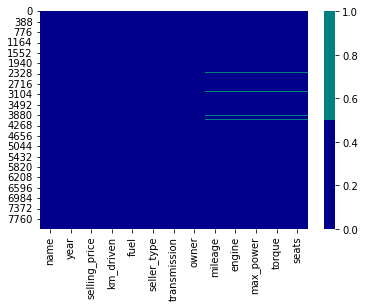

In [5]:
cols = df.columns 
colors = ['darkblue', 'teal'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

It is interesting that most of the missing data seems to be in the same area. Let's look at our missing data to see if we can find any pattern as to why it's not there.

In [6]:
df[df['torque'].isnull()].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


By inspection, it seems like the only real commonality is that almost all of these cars have the Manual transmission type. Not all of them though - some are Automatic. There don't seem to be any other commonalities among the missing data elements from car type to year or anything else. Thus, we may be able to assume that the data is missing somewhat at random. At the same time, when we look at the heatmap of missing data, it seems like if a car has one piece of missing data, it is missing data in most categories. This may suggest that the data is missing for a reason that we can't see in the dataset - for example, certain owners may have not provided data for their cars in general.

But, since we did notice most of the cars with missing data are Manual transmission, we can try to see if it is signficant at all.
For fun, let's compare what percent of the missing data has manual transmission compared to the dataset as a whole.

In [7]:
missing = df[df['torque'].isnull()]
missing_manual = len(missing[missing['transmission'] == 'Manual'])
missing_automatic = len(missing[missing['transmission'] == 'Automatic'])
df_manual = len(df[df['transmission'] == 'Manual'])
df_automatic =len(df[df['transmission'] == 'Automatic'])

missing_auto_percent =  round((missing_automatic / len(missing) * 100), 4)
df_auto_percent = round((df_automatic / len(df) * 100), 4)
missing_manual_percent =  round((missing_manual / len(missing) * 100), 4)
df_manual_percent = round((df_manual / len(df) * 100), 4)

print("From the missing data, " + str(missing_manual_percent) + "% of the cars are Manual transmission.")
print("From the overall dataframe, " + str(df_manual_percent) + "% of the cars are Manual transmission.")

From the missing data, 95.9459% of the cars are Manual transmission.
From the overall dataframe, 87.0817% of the cars are Manual transmission.


It does look like a higher percent of the missing data is from cars that are a Manual transmission compared to the percent of cars that are Manual in the overall dataset. This is an interesting note, but it likely doesn't glean any useful insight for us. Besides most of the cars being manual transmission, there is no clear reason why those cars would be missing data.

While we're on the topic, automatic vs manual transmission may be confusing to some. Especially for those in the younger audience, manual transmission may be completely foreign. I know that many of my friends have no idea how to drive a manual transmission car! Take a look at the following resource from State Farm to learn more about different transmission types: https://www.statefarm.com/simple-insights/auto-and-vehicles/manual-vs-automatic-transmissions#:~:text=The%20basic%20types%20of%20transmission,engine%20to%20drive%20the%20wheels.&text=Automatic%20cars%20shift%20gears%20on,gears%20with%20the%20stick%20shift

Since almost all the missing data comes from a few select cars (~220 of them of our 8000+ car dataset), which ends up only being around 2.7% of all our data, it makes the most sense to just drop those rows instead of trying to impute the missing values. 

In [8]:
# Remove the rows of data with null values
df.dropna (inplace = True)
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

Great, now there is no missing data and we can move on with our analysis.

### Data Types
Next up, we can take a look at the types of data we have in each column so we know what we're working with.

In [9]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object


Notice that a lot of our numeric variables are not the right type that we want. For example, mileage and max power should be floats, but they are currently objects. From brief investigation, we can notice that these columns are represented as strings, with the units given in each cell. For example, one cell for mileage says 17.7 kmpl, but we would prefer to have this as the numeric value 17.7 and note the units in the column name.

So our plan of action will be to extract the numeric values from those columns we need changed, convert the column to those values, and rename the column to signify the units for that category.

The columns that need work are: mileage, engine, and max_power.

In [10]:
# Note the entries are separated by whitespace, split on whitespace to expand into 2 columns
# Convert that first part to float and ignore the second column
numeric_mileage = df['mileage'].str.split(' ', expand = True)[0]
df['mileage'] = pd.to_numeric(numeric_mileage)
df.rename(columns={"mileage":"mileage (kmpl)"}, inplace = True)

numeric_engine = df['engine'].str.split(' ', expand = True)[0]
df['engine'] = pd.to_numeric(numeric_engine)
df.rename(columns={"engine":"engine (CC)"}, inplace = True)

numeric_power = df['max_power'].str.split(' ', expand = True)[0]
df['max_power'] = pd.to_numeric(numeric_power)
df.rename(columns={"max_power":"max_power (bhp)"}, inplace = True)

In [11]:
df.dtypes

name                object
year                 int64
selling_price        int64
km_driven            int64
fuel                object
seller_type         object
transmission        object
owner               object
mileage (kmpl)     float64
engine (CC)          int64
max_power (bhp)    float64
torque              object
seats              float64
dtype: object

In [12]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


Note that the data types are now accurate and the units are now included in the column.

Now the next issue we have is the various forms of categorical data. We have several types of fuel (Petrol, Diesel), transmission (Manual, Automatic), and the owner column is represented as a string instead of a numeric value. We want to portray the ordering for owner in particular, so that the 1st owner can be compared to 3rd owner. We will deal with the owner column first.

We will simply convert the strings to their respective integer. So "First Owner -> 1", etc.

In [13]:
map_dict = {"First Owner": 1, "Second Owner": 2, "Third Owner": 3, "Fourth & Above Owner": 4}
df["owner"] = df["owner"].map(map_dict)

The last thing we want to do is convert the selling price into USD. Since this dataset is from an Indian car website, all the prices are in rupees. While this is not necessary, since most of us are more accustomed to working with USD than rupees, we are going to convert this data. Doing this ahead of time will make graphs easier to read and make our analysis more relevant to us. We are going to convert selling price at the current exchange rate (as of December 2021) of 1 rupee to .013 USD.

In [14]:
df['selling_price'] = df['selling_price'] * .013

Our data looks good! We have no missing data and every piece of data we want to use has been properly converted to its necessary type. Our column labels are good. The last thing we want to do is drop the columns we will not be using further, then we will continue to data visualization.

We drop these particular columns for a number of reasons. However, in general, we don't think that these columns will help our analysis very much, or are too complex to wrangle with for the minimal value we think they'll provide.

In [15]:
df.drop(columns=['name','seller_type','engine (CC)','torque'], inplace = True)

## Part 3: Data Visualization

### Predictions

Before we do any direct analysis or visualization, let's first hypothesize what relationships we may find. We will then make graphs to investigate these relationships and then use statistic tests and machine learning models to confirm or deny these hypotheses.

The parameters we will be investigating (as selling price being the dependent variable) are:
* year
* km driven
* owner
* mileage
* max engine power
* seats

For these variables, we predict:
* As year goes up, selling price goes up (since newer cars are going to be more expensive)
* As km driven goes up, selling price goes down (the car will be more used, thus cheaper)
* As there are more owners, selling price goes down (the car will be more used)
    * This may be directly related to many of the other variables -- as there are more owners, the car is likely older and the car is likely more used
* As mileage goes up, selling price goes up (since high mileage cars are more desirable)
    * This may need to be compared with year/km driven for accurate statistics
* As max engine power goes up, selling price goes up (since powerful cars are more desirable)
    * We could potentially see the opposite, since high power may lead to deterioration for the car
* As number of seats go up, selling price goes up (larger cars are more expensive)

We will start by taking the mean value of each column, grouped by year.

In [16]:
grouped = df.groupby(['year'], as_index = False).mean()
grouped.head()

,year,selling_price,km_driven,owner,mileage (kmpl),max_power (bhp),seats
0,1994,936.000000,80000.000000,1.500000,14.450000,44.500000,4.500000
1,1995,715.000000,70000.000000,1.000000,16.100000,37.000000,4.000000
2,1996,533.000000,51000.000000,2.500000,16.100000,37.000000,4.000000
3,1997,1119.443000,99487.555556,2.333333,16.066667,49.666667,4.666667
4,1998,752.555556,71111.111111,2.333333,15.933333,48.888889,4.555556


[Text(0.5, 1.0, 'Average Selling Price vs. Year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Selling Price USD')]

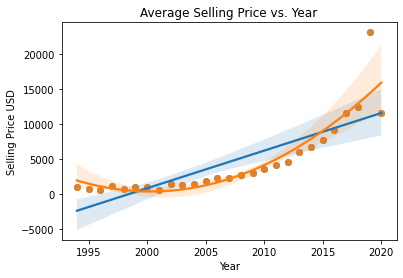

In [17]:
sns.regplot(data=grouped, x="year", y="selling_price")
sns.regplot(x="year", y="selling_price", data=grouped, order = 2).set(title= "Average Selling Price vs. Year",
xlabel = "Year", ylabel = "Selling Price USD")


This is a graph of the average selling price of cars by year. We overlay two regression lines - a linear regression line in blue and a quadratic regression line in orange. We can see our hypothesis of selling price increasing as year increases is supported by this graph. 

Interestingly, this is clearly not a linear relationship, as the selling price of used cars from 1995-2005 are very similar, but they increase very quickly from 2010-2020. In fact, the quadratic regression line fits almost perfectly. This shows that very new cars are much more expensive than old cars, but all cars older than around 10 years ago are around the same price.

Next, we'll look at Selling Price vs. Kilometers Driven. Since there are too many datapoints to make this graph readable, we will take a random subset of our data frame to provide a semi-accurate representation of our total data.

[Text(0.5, 1.0, 'Selling Price vs. Kilometers Driven'),
 Text(0.5, 0, 'Kilometers Driven'),
 Text(0, 0.5, 'Selling Price USD')]

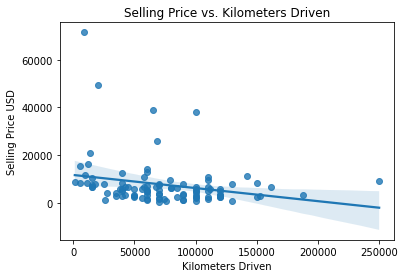

In [18]:
sample = df.sample(n=100)
sample
sns.regplot(data=sample, x="km_driven", y="selling_price").set(title= "Selling Price vs. Kilometers Driven",
xlabel = "Kilometers Driven", ylabel = "Selling Price USD")

We can see our hypothesis of selling price decreasing as kilometers driven increases is  supported by this graph. There seems to be a general relationship of price decreasing as km driven goes up but there are clearly outliers to this relationship. This shows that km driven certainly has an impact, but it is not the most important factor - other variables are definitely coming into play.

[Text(0.5, 1.0, 'Average Selling Price vs. # Owners'),
 Text(0.5, 0, '# Owners'),
 Text(0, 0.5, 'Selling Price USD')]

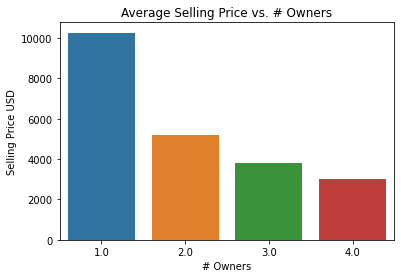

In [19]:
grouped = df.groupby(['owner'], as_index = False).mean()
sns.barplot(data=grouped, x="owner", y="selling_price").set(title= "Average Selling Price vs. # Owners",
xlabel = "# Owners", ylabel = "Selling Price USD")

We can see our hypothesis of selling price decreasing as number of owners increases is confirmed by this graph. The averages of having 2-4 owners are somewhat similar, with 1 owner clearly leading to a higher selling price. But again, there may be multiple variables at play here that we just can't see. There is no reason to assume that it is strictly the number of owners decreasing the value of these cars. For example, the decrease in price may be explained by other factors, such as more owners equating to older cars in general. 

[Text(0.5, 1.0, 'Selling Price vs. Mileage'),
 Text(0.5, 0, 'Mileage (kmpl)'),
 Text(0, 0.5, 'Selling Price USD')]

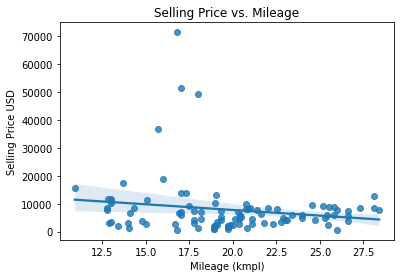

In [20]:
sample = df.sample(n=100)
sns.regplot(data=sample, x="mileage (kmpl)", y="selling_price").set(title= "Selling Price vs. Mileage",
xlabel = "Mileage (kmpl)", ylabel = "Selling Price USD")

Next, we graph Selling Price vs. Mileage of cars. We can see that our hypothesis of selling price increasing as mileage increases is rejected by this graph. There seems to be a minimal relationship between the two variables. This is not what we would expect. Normally, we'd think that cars that have can drive more miles per gallon (or in this case kilometers per liter) would sell for a higher price, but it seems that they don't.

To get an idea of how the cars on this plot stack up against the best (and worst) performing cars in terms of mileage, check out this resource updated for 2022:
 https://www.fueleconomy.gov/feg/best-worst.shtml

[Text(0.5, 1.0, 'Selling Price vs. Max Engine Power'),
 Text(0.5, 0, 'Max Engine Power (horsepower)'),
 Text(0, 0.5, 'Selling Price USD')]

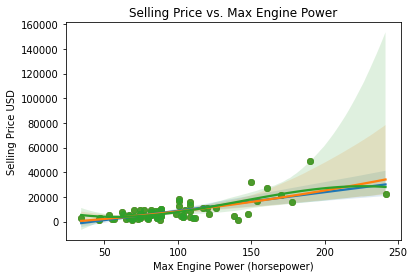

In [21]:
sample = df.sample(n=100)
sns.regplot(data=sample, x="max_power (bhp)", y="selling_price")
sns.regplot(data=sample, x="max_power (bhp)", y="selling_price", order = 2)
sns.regplot(data=sample, x="max_power (bhp)", y="selling_price", order = 3).set(title= "Selling Price vs. Max Engine Power",
xlabel = "Max Engine Power (horsepower)", ylabel = "Selling Price USD")

We can also graph Selling Price vs Max Engine power. Here, we overlay three regression lines of orders 1, 2,and 3. We can see that the hypothesis of selling price increasing as max power increases is supported, but the relationship is definitely not linear. The majority of cars seem to be around 50-150 bhp, but outliers for this max power certainly lead to high selling price. These are likely very high quality cars that are more powerful than the average, leading to a higher price.

[Text(0.5, 1.0, 'Average Selling Price vs. # Seats'),
 Text(0.5, 0, '# Seats'),
 Text(0, 0.5, 'Selling Price USD')]

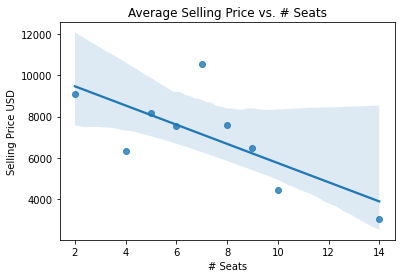

In [22]:
grouped = df.groupby(['seats'], as_index = False).mean()
sns.regplot(data=grouped, x="seats", y="selling_price").set(title= "Average Selling Price vs. # Seats",
xlabel = "# Seats", ylabel = "Selling Price USD")

Lastly, we can plot the Average Selling Price vs. the Number of Seats in a car. We can see that the hypothesis of selling price increasing as seats increase is rejected by this graph. There is almost no relationship between seats and selling price -- if anything we see  that our linear regression line is  negative, so as seats go up, selling price decreases. This is a very interesting discovery to make as it is counterintuitive. This just goes to show why graphing and understanding your data is important. The assumptions you start with can easily be rejected, even if they are unintuitive.

As an aside, it is interesting that the highest seating vehicles sell for the least. Fourteen seats is not a standard size for any car, so a possible explanation could be that these vehicles were old buses or vans that are no longer being used by a school/company.

From these graphs, we can see the most significant parameters for predicting selling price are year and max power. Number of owners and mileage seem to not have any impact on the selling price. Kilometers driven and number of seats may have some impact, but hardly any.

## Part 4: Data Analysis

The goal of data analysis is to be able to predict missing information given other features, using a model trained from a large dataset with the same features recorded. In this case, we aim to write a regressor that can predict the selling price of a vehicle given the year, Kilometers driven, order of ownership, mileage, maximum engine power, number of sets, type of transmission, and type of fuel. 

## Preprocessing

Given that some of the features in the dataset are not continuous, but rather categorical, it is important that we find a good quantitative method for representing these categorical features. Given that the options for categories for both the transmission and fuel type are limited, it would be a good idea to one-hot encode them. This means that each category in the feature is given its own binary feature - a car having a diesel engine among the choices of gasoline, diesel, and electric could be represented as [0, 1, 0].

One-hot encoding is a fantastic tool to understand for anyone interested in machine learning. Although we only briefly touch on it here, this article really explains well what it is and why we need to do it in this situation: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [23]:
# Imports
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

# Mark which columns to take at value, and which ones to one-hot encode
continuousCols = ["year", "km_driven", "owner", "mileage (kmpl)", "max_power (bhp)", "seats"]
categoricalCols = ["transmission", "fuel"]
outputCol = "selling_price"

# Create sklearn encoder
enc = OneHotEncoder()

# Extract continuous and categorical data columns
X = df[continuousCols].to_numpy()
X_cat = df[categoricalCols].to_numpy()
X = np.nan_to_num(X)

# One-hot encode categorical columns
enc.fit(X_cat)
X_cat = enc.transform(X_cat).toarray()

# Combine continuous and categorical data
X = np.concatenate((X, X_cat), axis=1)

# Extract output columns
Y = df[outputCol].to_numpy()
Y = np.expand_dims(Y, axis=0).T

print(X.shape, Y.shape)


(7906, 12) (7906, 1)


## Train/Validation Split

After preprocessing our data, we must train our classifier and evaluate using 10-fold cross-validation. By training on 90% of the data and evaluating on 10%, for each 10% of the data, we can get ten equally-weighted scores of effectivity without eliminating any data from consideration. See how this is implemented using the code below:

10-fold cross validation is another great technique to know about in machine learning. It comes from it's more general big brother "k-fold cross validation", but in this case we just set k to 10. This article explains in depth what it is and how to choose a good value for k:
https://machinelearningmastery.com/k-fold-cross-validation/

In [24]:
# Imports
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Training function for one iteration given a training set, evaluate using validation set
def trainData(X_train, Y_train, X_val, Y_val, method="KNReg"):
    if method == "KNReg":
        # Remove extra dimension from Y
        Y_train, Y_val = Y_train.flatten(), Y_val.flatten()

        # Initialize SVM Regressor, add scaler
        regr = make_pipeline(StandardScaler(), KNeighborsRegressor())
        
        # Fit model, get predictions and R^2 score for validation set
        regr.fit(X_train, Y_train)
        pred = regr.predict(X_val)
        r2 = regr.score(X_val, Y_val)
        
        # Return differences and r^2 set
        return np.mean(Y_val - pred), r2

# Shuffle X and Y data uniformly
X, Y = shuffle(X, Y)
print(X.shape, Y.shape)

# Set parameters and data collection for cross-validation
crossValN = 10
interval = X.shape[0]//crossValN
diffs = []
losses = []

# Iterate through cross-validation
for i in range(crossValN):
    
    # Extract train and validation set based on iteration
    val_start, val_end = interval * i , interval * (i+1)
    X_train = np.concatenate((X[:val_start], X[val_end:]))
    X_val = X[val_start:val_end]
    Y_train = np.concatenate((Y[:val_start], Y[val_end:]))
    Y_val = Y[val_start:val_end]

    # Train on given sets
    print(f"Training on validation set {i}:")
    diff, r2 = trainData(X_train, Y_train, X_val, Y_val)

    # Append metrics to global list
    diffs.append(diff)
    losses.append(r2)
    print(diff, r2)

# Display training metrics
mean_diff = sum(diffs) / len(diffs)
mean_r2 = sum(losses) / len(losses)
print(f"Average difference over 10-fold cross-validation: {mean_diff}")
print(f"Average R^2 loss over 10-fold cross-validation: {mean_r2}")



(7906, 12) (7906, 1)
Training on validation set 0:
61.7439311392405 0.9630683605205397
Training on validation set 1:
-131.76004860759497 0.9435077743841558
Training on validation set 2:
-50.107677215189916 0.9508807458832249
Training on validation set 3:
-66.40540860759498 0.9472181240807653
Training on validation set 4:
-10.61144911392411 0.9416930723806429
Training on validation set 5:
-70.32011341772154 0.9619183085047105
Training on validation set 6:
193.73351367088603 0.9053756940131943
Training on validation set 7:
143.57006810126578 0.9450375273325258
Training on validation set 8:
38.55665063291135 0.9348197243496029
Training on validation set 9:
-59.83699569620258 0.9659105568923005
Average difference over 10-fold cross-validation: 4.856247088607558
Average R^2 loss over 10-fold cross-validation: 0.9459429888341662


Given that our mean deviation from ground truth prices was only Rs. 15, or $0.20 in USD, and that our R^2 value was relatively close to 1.0 at 0.944 on the validation set, we can conclude that our model is able to fairly accurately predict the price of a used car given the aforementioned parameters.

## Part 5: Insights

Through our data exploration and analysis, we can clearly see what factors determine a used car's selling price and which are not as signficant.

Our first clear conclusion is newer cars are more expensive. This makes a lot of sense, since people are more likely to buy cars that are cleaner and less used. Trying to buy used cars that are very new will be very difficult since they will be expensive. However, most cars older than 10-15 years ago will be around the same price. If you are trying to sell an old car, it will not lose you a lot of money to wait a few more years, since the selling price will be similar.

Another clear conclusion is that cars with high max power will be have a higher selling price. You may be getting ripped off if you buy a very expensive car with a low max power. Similarly, if you are selling a used car with high max power, you should be able to get a good amount of money.

We have also seen that some conditions of the car are not very significant for the selling price. Number of owners and mileage will have less of an impact on selling price than many of these other factors. Kilometers driven and number of seats may have some impact, but hardly any. If you care about number of seats when buying a new car, then you should be able to find similar priced cars of very different sizes.

One conclusion was very confusing -- why does kilometers driven not have an impact on the price? Perhaps people simply just care about the age and power of the car rather than use -- if a car is new and powerful, then it will be expensive.

If you are interested in learning more about the sale of new cars, you can check out some of the following resources. 

https://www.kbb.com/whats-my-car-worth/
https://fortune.com/2021/12/09/used-car-models-biggest-price-increase/
https://publish.manheim.com/en/services/consulting/used-vehicle-value-index.html
https://www.consumerreports.org/buying-a-car/when-to-buy-a-used-car-a6584238157/

We hope you enjoyed our project!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6677ed25-311e-433f-acbc-a3768f5d25a5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>